In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_columns', None)

In [3]:
DATA_PATH = "../../Data/STRUCTURED_DATA/DATA_CEA/all_cea_data.csv"

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
df.head()

,id_pat,date,activity,timeline,Avant_pied_droit_appui,Medio_pied_droit_appui,Arriere_pied_droit_appui,Avant_pied_gauche_appui,Medio_pied_gauche_appui,Arriere_pied_gauche_appui,Semelle_Droite_Capt_1,Semelle_Droite_Capt_2,Semelle_Droite_Capt_3,Semelle_Droite_Capt_4,Semelle_Droite_Capt_5,Semelle_Droite_Capt_6,Semelle_Droite_Capt_7,Semelle_Droite_Capt_8,Semelle_Droite_Capt_9,Semelle_Droite_Capt_10,Semelle_Gauche_Capt_1,Semelle_Gauche_Capt_2,Semelle_Gauche_Capt_3,Semelle_Gauche_Capt_4,Semelle_Gauche_Capt_5,Semelle_Gauche_Capt_6,Semelle_Gauche_Capt_7,Semelle_Gauche_Capt_8,Semelle_Gauche_Capt_9,Semelle_Gauche_Capt_10,Te,CI_Droit_qui_se_leve,CI_Droit_qui_se_pose,CI_Gauche_qui_se_leve,CI_Gauche_qui_se_pose,Acc_x_G,Acc_y_G,Acc_z_G,Gyro_x_G,Gyro_y_G,Gyro_z_G,Acc_x_D,Acc_y_D,Acc_z_D,Gyro_x_D,Gyro_y_D,Gyro_z_D
0,P01,2019-05-07,2minBassin,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,63.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.50,-9.38,0.25,-0.025089,-0.001091,0.021817,-0.12,-9.38,2.67,-0.002182,-0.005454,-0.001091
1,P01,2019-05-07,2minBassin,0.025575,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,10.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.43,-9.51,0.34,-0.013090,-0.021817,0.005454,-0.15,-9.37,2.66,-0.001091,-0.001091,-0.004363
2,P01,2019-05-07,2minBassin,0.051151,1.0,0.0,0.0,0.0,1.0,0.0,50.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,10.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.15,-9.62,0.51,-0.001091,-0.018544,0.007636,-0.12,-9.37,2.67,-0.002182,-0.005454,-0.003272
3,P01,2019-05-07,2minBassin,0.076726,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,33.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,31.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.20,-9.63,0.62,-0.014181,0.011999,-0.003272,-0.13,-9.36,2.67,-0.002182,-0.005454,-0.002182
4,P01,2019-05-07,2minBassin,0.102302,1.0,0.0,0.0,0.0,1.0,0.0,50.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,63.0,11.0,5.0,7.0,13.0,46.0,31.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.20,-9.51,0.93,-0.085085,0.078540,-0.041452,-0.11,-9.37,2.64,-0.003272,-0.001091,0.000000


# DATA Processing

In [6]:
train_cols = [col for col in df.columns if col.startswith(('Acc', 'Gyro'))]
target_cols = [col for col in df.columns if col.startswith('CI')]

In [7]:
df.shape

(1232293, 47)

In [8]:
train_df = df[train_cols+target_cols]

In [9]:
train_df.isna().sum()

Acc_x_G                  122711
Acc_y_G                  122711
Acc_z_G                  122711
Gyro_x_G                 122711
Gyro_y_G                 122711
Gyro_z_G                 122711
Acc_x_D                  122711
Acc_y_D                  122711
Acc_z_D                  122711
Gyro_x_D                 122711
Gyro_y_D                 122711
Gyro_z_D                 122711
CI_Droit_qui_se_leve          0
CI_Droit_qui_se_pose          0
CI_Gauche_qui_se_leve         0
CI_Gauche_qui_se_pose         0
dtype: int64

In [10]:
train_df = train_df.dropna()

In [11]:
print(train_df.shape)

(1109582, 16)


In [12]:
X = train_df[train_cols]
y = train_df[target_cols]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(776707, 12) (332875, 12) (776707, 4) (332875, 4)


In [16]:
print(y_train.sum())
print(y_test.sum())

CI_Droit_qui_se_leve     6185.0
CI_Droit_qui_se_pose     6152.0
CI_Gauche_qui_se_leve    6225.0
CI_Gauche_qui_se_pose    6240.0
dtype: float64
CI_Droit_qui_se_leve     2611.0
CI_Droit_qui_se_pose     2644.0
CI_Gauche_qui_se_leve    2680.0
CI_Gauche_qui_se_pose    2665.0
dtype: float64


In [17]:
print(y_train.sum() / y_train.shape[0] * 100)
print(y_test.sum() / y_test.shape[0] * 100)

CI_Droit_qui_se_leve     0.796311
CI_Droit_qui_se_pose     0.792062
CI_Gauche_qui_se_leve    0.801461
CI_Gauche_qui_se_pose    0.803392
dtype: float64
CI_Droit_qui_se_leve     0.784379
CI_Droit_qui_se_pose     0.794292
CI_Gauche_qui_se_leve    0.805107
CI_Gauche_qui_se_pose    0.800601
dtype: float64


# Model training

In [18]:
from tensorflow import keras

In [19]:
X_train = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [20]:
num_classes = len(target_cols)

In [21]:
# Shuffle training data
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

In [70]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)


In [71]:
epochs = 5
batch_size = 128

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=["categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)


Epoch 1/5
4855/4855 [==============================] - 84s 17ms/step - loss: 0.0456 - categorical_accuracy: 0.2991 - val_loss: 0.0452 - val_categorical_accuracy: 0.3120
Epoch 2/5
4855/4855 [==============================] - 82s 17ms/step - loss: 0.0464 - categorical_accuracy: 0.3644 - val_loss: 0.0486 - val_categorical_accuracy: 0.2318
Epoch 3/5
4855/4855 [==============================] - 71s 15ms/step - loss: 0.0493 - categorical_accuracy: 0.3557 - val_loss: 0.0505 - val_categorical_accuracy: 0.3110
Epoch 4/5
4855/4855 [==============================] - 71s 15ms/step - loss: 0.0525 - categorical_accuracy: 0.3359 - val_loss: 0.0541 - val_categorical_accuracy: 0.4325
Epoch 5/5
4855/4855 [==============================] - 70s 15ms/step - loss: 0.0573 - categorical_accuracy: 0.3422 - val_loss: 0.0586 - val_categorical_accuracy: 0.3253


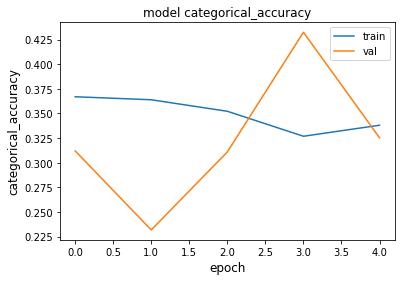

In [72]:
metric = "categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()

In [73]:
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_cols))

                       precision    recall  f1-score   support

 CI_Droit_qui_se_leve       0.97      0.33      0.49    325122
 CI_Droit_qui_se_pose       0.00      0.11      0.01      2632
CI_Gauche_qui_se_leve       0.01      0.24      0.01      2584
CI_Gauche_qui_se_pose       0.02      0.32      0.03      2537

             accuracy                           0.33    332875
            macro avg       0.25      0.25      0.14    332875
         weighted avg       0.95      0.33      0.48    332875



**TODOs list:**
- création des sequences temporelles
- élimination des séquences sans catégorie / labéliser en tant que "Autre"
- 